In [24]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
#Read Data
path = '/content/data.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

In [26]:
#show data details
print('data = \n' ,data.head(5) )
print('**************************************')
print('data.describe = \n',data.describe())
print('**************************************')

data = 
    Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
**************************************
data.describe = 
               Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
**************************************


In [27]:
# rescaling data
data = (data - data.mean()) / data.std()

In [28]:
print('data after normalization = ')
print(data.head(2) )

data after normalization = 
      Size  Bedrooms     Price
0  0.13001 -0.223675  0.475747
1 -0.50419 -0.223675 -0.084074


In [29]:
# add ones column
data.insert(0, 'Ones', 1)

In [30]:
# separate X (training data) from y (target variable)
cols = data.shape[1] #shape express 97 to 2 then cols = 2 
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [31]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)

X.shape =  (47, 3)
theta.shape =  (1, 3)
y.shape =  (47, 1)


In [32]:
# cost function
def computeCost(X, y, theta):
    z = np.power(  ((X * theta.T) - y)    , 2    )
    return np.sum(z) / (2 * len(X))

In [33]:
print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

computeCost(X, y, theta) =  0.48936170212765967


In [34]:
# GD function
def gradientDescent(X, y, theta, alpha, iters):
    
    temp = np.matrix(np.zeros(theta.shape))
    
    #print('temp is : ' , temp)
    parameters = int(theta.ravel().shape[1]) # 1 x 2 shape[1] express seconed value
    
    # print('parameter is : ' , parameters)
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [35]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000  #iters it is number of temps or trying

In [36]:
Best_Theta, Loss_Function = gradientDescent(X, y, theta, alpha, iters)


In [37]:
print('computeCost = ' , computeCost(X, y, Best_Theta))


computeCost =  0.13070336960771892


In [38]:
# get best fit line for Size vs. Price

x = np.linspace(data.Size.min(), data.Size.max(), 100)

f = Best_Theta[0, 0] + (Best_Theta[0, 1] * x)


Text(0.5, 1.0, 'Size vs. Price')

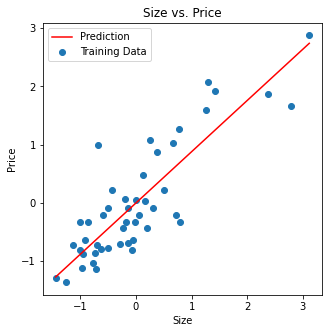

In [39]:
# draw the line for Size vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Size, data.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')

In [40]:

# get best fit line for Bedrooms vs. Price

x = np.linspace(data.Bedrooms.min(), data.Bedrooms.max(), 100)

f = Best_Theta[0, 0] + (Best_Theta[0, 1] * x)


Text(0.5, 1.0, 'Size vs. Price')

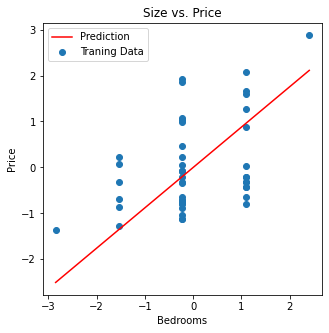

In [41]:
# draw the line  for Bedrooms vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Bedrooms, data.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')

Text(0.5, 1.0, 'Error vs. Training Epoch')

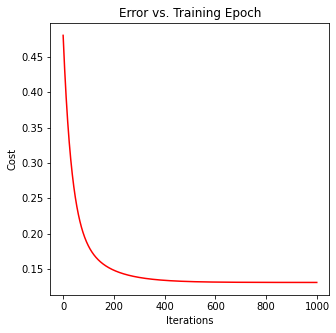

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), Loss_Function, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')